In [2]:
# IMPORT LIBRARIES
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

import os
from time import time
from time import sleep

import pandas as pd

In [3]:
# CREATE DATA FRAME
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


In [4]:
# SET ROWS AND COLUMNS TO MAX
pd.set_option('display.max_rows', None)       
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [5]:
# DEFINE A FUNCTION THAT WILL RETRIEVE THE DATA FROM THE WEBSITE
def api_runner():
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '96044b4fccda44729ef4c78ffd58f584',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        
        df2 = pd.json_normalize(data['data'])
        df2['timestamp'] = pd.to_datetime('now')
        return df2
    
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
    
# if data rate exceeded error, run this in anacaonda prompt: "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10" 

In [6]:
# CSV FILE PATHS
csv_file_overwrite = r'C:\Users\kathm\OneDrive\Desktop\DataAnalystBootCamp\Python\automatic_api_pullout\crypto_data_overwrite.csv'
csv_file_append    = r'C:\Users\kathm\OneDrive\Desktop\DataAnalystBootCamp\Python\automatic_api_pullout\crypto_data_append.csv'

In [7]:
# CONTINUOUS DATA FETCHING LOOP
while True:
    new_data  = api_runner()

    if not new_data.empty:

         # 1️⃣ Append to in-memory DataFrame
        df = pd.concat([df, new_data], ignore_index=True)
        
        # OVERWRITE CSV: (latest snapshot of top 15 cryptocurrencies)
        new_data.to_csv(csv_file_overwrite, index = False)

        # APPEND DATA TO CSV (historical log of top 15 cryptocurrencies for trend analysis)
        new_data.to_csv(
            csv_file_append, 
            mode = 'a' if os.path.exists(csv_file_append) else 'w',
            header = not os.path.exists(csv_file_append),
            index = False
        )

        print(f"Appended {len(new_data)} rows and updated overwrite CSV at {pd.to_datetime('now')}")

    else:
        print("No new data fetched this run.")

    sleep(60)  # wait 1 minute before next API call

Appended 15 rows and updated overwrite CSV at 2026-02-18 23:00:52.030129
Appended 15 rows and updated overwrite CSV at 2026-02-18 23:01:56.384947
Appended 15 rows and updated overwrite CSV at 2026-02-18 23:03:00.696295


KeyboardInterrupt: 

In [8]:
# READ OVERWRITE CSV FILE
pd.read_csv(r'C:\Users\kathm\OneDrive\Desktop\DataAnalystBootCamp\Python\automatic_api_pullout\crypto_data_overwrite.csv')

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12562,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19991325.00000,19991325.00000,False,1344571576114.36011,NaN,1,NaN,NaN,NaN,2026-02-18T15:01:00.000Z,67257.75186,32457920876.16286,1.14890,-0.00658,0.51990,1.33954,-27.53633,-23.75606,-25.97437,1344571576114.35962,58.07280,1412412788967.29004,NaN,2026-02-18T15:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-18 23:03:00.667395
1,1027,Ethereum,ETH,ethereum,11577,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120692424.04242,120692424.04242,True,238626595080.20999,NaN,2,NaN,NaN,NaN,2026-02-18T15:01:00.000Z,1977.14643,20605905575.03967,9.87320,0.32000,1.41914,2.16913,-38.47578,-33.62715,-33.91306,238626595080.21350,10.30640,238626595080.20999,NaN,2026-02-18T15:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-18 23:03:00.667395
2,825,Tether USDt,USDT,tether,171331,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,183741587995.21899,187955768182.36957,True,187880957639.62000,NaN,3,NaN,NaN,NaN,2026-02-18T15:01:00.000Z,0.99960,69192754225.65565,-0.20660,-0.00407,-0.00310,-0.05291,0.02430,0.00751,0.06007,183668454789.16092,7.93270,187880957639.62000,NaN,2026-02-18T15:01:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-02-18 23:03:00.667395
3,52,XRP,XRP,xrp,1799,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,60917315351.00000,99985721048.00000,False,146420352539.67001,NaN,4,NaN,NaN,NaN,2026-02-18T15:02:00.000Z,1.46441,2159532650.41189,-1.34020,-0.29062,2.02538,7.60603,-26.02524,-24.02919,-30.91044,89208085874.40167,3.85290,146441262817.29999,NaN,2026-02-18T15:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-18 23:03:00.667395
4,1839,BNB,BNB,bnb,3135,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",136359169.74000,136359169.74000,136359169.74000,False,83451133989.20000,NaN,5,NaN,NaN,NaN,2026-02-18T15:01:00.000Z,611.99503,1289914746.35654,-1.18890,0.24819,0.03620,2.31106,-33.76108,-28.21767,-31.78068,83451133989.20273,3.60430,83451133989.20000,NaN,2026-02-18T15:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-18 23:03:00.667395
5,3408,USDC,USDC,usd-coin,37524,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,73539793944.60339,73539793944.60339,False,73546673672.11000,NaN,6,60901219650.23000,60906917025.40196,NaN,2026-02-18T15:01:00.000Z,1.00009,9685690919.01143,7.78470,0.00255,0.00504,0.02458,0.02318,0.03337,0.04324,73546673672.11258,3.17650,73546673672.11000,NaN,2026-02-18T15:01:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-02-18 23:03:00.667395
6,5426,Solana,SOL,solana,1089,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,568239334.49742,620660735.41642,True,51245550890.00000,NaN,7,525236893.30000,43366774163.42771,NaN,2026-02-18T15:01:00.000Z,82.56612,3331681333.22373,11.06570,-0.09357,-0.82582,3.31792,-38.15341,-34.62987,-41.33678,46917319031.22598,2.02640,51245550890.00000,NaN,2026-02-18T15:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-18 23:03:00.667395
7,1958,TRON,TRX,tron,1300,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,94728215560.85890,94728217323.50169,True,26521799704.

In [9]:
# READ APPEND CSV FILE
pd.read_csv(r'C:\Users\kathm\OneDrive\Desktop\DataAnalystBootCamp\Python\automatic_api_pullout\crypto_data_append.csv')

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12562,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19990837.00000,19990837.00000,False,1353888402750.94995,NaN,1,NaN,NaN,NaN,2026-02-17T16:26:00.000Z,67725.44855,32815064676.96882,-14.10450,1.43181,0.11417,-2.54007,-28.77353,-23.32891,-24.37906,1353888402750.95068,57.94540,1422234419587.83008,NaN,2026-02-17T16:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-18 00:28:15.087039
1,1027,Ethereum,ETH,ethereum,11574,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120692440.47146,120692440.47146,True,239787635892.59000,NaN,2,NaN,NaN,NaN,2026-02-17T16:27:00.000Z,1986.76599,19049721326.30405,-22.24730,1.91435,0.88224,-2.02555,-40.35618,-33.33888,-32.85450,239787635892.58691,10.26270,239787635892.59000,NaN,2026-02-17T16:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-18 00:28:15.087039
2,825,Tether USDt,USDT,tether,171315,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,183751887997.06967,187956018072.05417,True,187887510375.56000,NaN,3,NaN,NaN,NaN,2026-02-17T16:26:00.000Z,0.99964,70657762290.58762,-16.36300,-0.01942,0.02376,-0.04362,-0.00584,0.02043,0.03854,183684912655.16769,7.86160,187887510375.56000,NaN,2026-02-17T16:26:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-02-18 00:28:15.087039
3,52,XRP,XRP,xrp,1799,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,60917315351.00000,99985721048.00000,False,147959114441.54999,NaN,4,NaN,NaN,NaN,2026-02-17T16:26:00.000Z,1.47980,2235410743.66394,-42.90760,2.09829,-0.70565,4.86570,-27.93847,-21.63346,-29.15228,90145592180.74651,3.85820,147980244469.63000,NaN,2026-02-17T16:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-18 00:28:15.087039
4,1839,BNB,BNB,bnb,3135,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",136359198.85000,136359197.80000,136359197.80000,False,84210823605.64999,NaN,5,NaN,NaN,NaN,2026-02-17T16:26:00.000Z,617.56614,1299408609.29825,-11.67680,0.73200,1.16871,-0.47305,-34.95017,-27.34148,-30.84867,84210823605.65070,3.60420,84210824254.10001,NaN,2026-02-17T16:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-18 00:28:15.087039
5,3408,USDC,USDC,usd-coin,37515,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,73868572258.08179,73868572258.08179,False,73863504658.31000,NaN,6,60901219650.23000,60897041648.71640,NaN,2026-02-17T16:26:00.000Z,0.99993,9356513418.30681,-9.49290,-0.03165,0.00394,-0.06850,0.01360,0.01374,0.02356,73863504658.31163,3.16130,73863504658.31000,NaN,2026-02-17T16:26:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-02-18 00:28:15.087039
6,5426,Solana,SOL,solana,1089,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,568200633.12126,620661432.41328,True,52395605528.96000,NaN,7,525236893.30000,44339963196.35427,NaN,2026-02-17T16:27:00.000Z,84.41898,3117659913.87056,-18.38490,1.26166,0.81770,-0.10238,-40.56282,-33.05860,-37.13026,47966918322.22761,2.05290,52395605528.96000,NaN,2026-02-17T16:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-18 00:28:15.087039
7,1958,TRON,TRX,tron,1300,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,94726888022.05130,94726889969.86208,True,

In [10]:
# SHOW DF
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12562,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19991325.00000,19991325.00000,False,1342386819179.02002,NaN,1,NaN,NaN,None,2026-02-18T14:58:00.000Z,67148.46661,32543522193.49559,1.82560,-0.04935,0.39560,0.96381,-27.61744,-23.88103,-26.20808,1342386819179.01978,57.97840,1410117798733.16992,None,2026-02-18T14:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-18 23:00:51.968995
1,1027,Ethereum,ETH,ethereum,11577,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120692424.04242,120692424.04242,True,237854459233.20001,NaN,2,NaN,NaN,None,2026-02-18T14:58:00.000Z,1970.74888,20570012652.56897,10.13930,0.16212,1.27463,1.59345,-38.62736,-33.84029,-34.35435,237854459233.20047,10.27310,237854459233.20001,None,2026-02-18T14:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-18 23:00:51.968995
2,825,Tether USDt,USDT,tether,171331,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,183741587995.21899,187955768182.36954,True,187878897748.10001,NaN,3,NaN,NaN,None,2026-02-18T14:58:00.000Z,0.99959,69054012428.24211,-0.05420,0.00452,0.01436,0.00447,0.01893,0.00692,0.06018,183666441082.73361,7.93270,187878897748.10001,None,2026-02-18T14:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-02-18 23:00:51.968995
3,52,XRP,XRP,xrp,1799,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,60917315351.00000,99985721048.00000,False,146412622967.10001,NaN,4,NaN,NaN,None,2026-02-18T14:58:00.000Z,1.46434,2180632278.40240,-1.06580,-0.24181,1.98099,7.34489,-26.00856,-24.04005,-31.08693,89203376553.85806,3.85270,146433532140.85999,None,2026-02-18T14:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-18 23:00:51.968995
4,1839,BNB,BNB,bnb,3135,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",136359170.42000,136359169.74000,136359169.74000,False,83420021641.98000,NaN,5,NaN,NaN,None,2026-02-18T14:58:00.000Z,611.76686,1292618386.91124,-0.95230,0.27000,-0.02580,2.22834,-33.76262,-28.25038,-31.85982,83420021641.97897,3.60300,83420022057.98000,None,2026-02-18T14:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-18 23:00:51.968995
5,3408,USDC,USDC,usd-coin,37524,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,73539793944.60339,73539793944.60339,False,73535962609.88000,NaN,6,60901219650.23000,60898046770.01064,None,2026-02-18T14:58:00.000Z,0.99995,9726145726.94456,8.57380,-0.00557,0.00149,0.00724,0.00452,0.01454,0.02430,73535962609.88000,3.17610,73535962609.88000,None,2026-02-18T14:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-02-18 23:00:51.968995
6,5426,Solana,SOL,solana,1089,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,568239334.49742,620660735.41642,True,51260531554.22000,NaN,7,525236893.30000,43379451616.80179,None,2026-02-18T14:59:00.000Z,82.59026,3346805544.43729,11.63570,0.02462,-0.83590,2.83935,-38.11998,-34.61219,-41.39948,46931034419.00681,2.02700,51260531554.22000,None,2026-02-18T14:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-18 23:00:51.968995
7,1958,TRON,TRX,tron,1300,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94728215560.85890,94728217323.50169,True

In [13]:
# GROUP DATA BY NAME AND GET PERCENT CHANGE OVER TIME
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d',	'quote.USD.percent_change_60d',	'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.04845,0.42188,1.06913,-27.59152,-23.83750,-26.13922
Ethereum,0.21047,1.32034,1.77489,-38.56131,-33.75068,-34.18018
Tether USDt,0.00379,0.01809,-0.00525,0.02072,0.01330,0.05708
XRP,-0.26108,2.00654,7.43575,-26.00862,-24.03547,-31.01684
BNB,0.26182,0.00203,2.25925,-33.75816,-28.23529,-31.82668
USDC,0.00045,0.00957,0.01846,0.01253,0.02694,0.03069
Solana,-0.01490,-0.83169,3.16617,-38.13372,-34.61913,-41.36118
TRON,0.06474,-0.13154,1.71130,-10.29552,-0.00848,-1.18595
Dogecoin,0.58179,1.24286,12.44159,-21.74275,-24.09043,-36.87791


In [15]:
# CONVERTING DATA TO LONG FORMAT USING .STACK()
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.04845
              quote.USD.percent_change_24h     0.42188
              quote.USD.percent_change_7d      1.06913
              quote.USD.percent_change_30d   -27.59152
              quote.USD.percent_change_60d   -23.83750
              quote.USD.percent_change_90d   -26.13922
Ethereum      quote.USD.percent_change_1h      0.21047
              quote.USD.percent_change_24h     1.32034
              quote.USD.percent_change_7d      1.77489
              quote.USD.percent_change_30d   -38.56131
              quote.USD.percent_change_60d   -33.75068
              quote.USD.percent_change_90d   -34.18018
Tether USDt   quote.USD.percent_change_1h      0.00379
              quote.USD.percent_change_24h     0.01809
              quote.USD.percent_change_7d     -0.00525
              quote.USD.percent_change_30d     0.02072
              quote.USD.percent_change_60d     0.01330
              quote.US

In [16]:
# DF4 IS NOW A SERIES NOT A DATAFRAME
type(df4)

pandas.core.series.Series

In [23]:
# CONVERT DF4 TO DATAFRAME AND ASSIGN IT TO DF5
df5 = df4.to_frame(name = 'values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.04845
             quote.USD.percent_change_24h   0.42188
             quote.USD.percent_change_7d    1.06913
             quote.USD.percent_change_30d -27.59152
             quote.USD.percent_change_60d -23.83750
             quote.USD.percent_change_90d -26.13922
Ethereum     quote.USD.percent_change_1h    0.21047
             quote.USD.percent_change_24h   1.32034
             quote.USD.percent_change_7d    1.77489
             quote.USD.percent_change_30d -38.56131
             quote.USD.percent_change_60d -33.75068
             quote.USD.percent_change_90d -34.18018
Tether USDt  quote.USD.percent_change_1h    0.00379
             quote.USD.percent_change_24h   0.01809
             quote.USD.percent_change_7d   -0.00525
             quote.USD.percent_change_30d   0.02072
             quote.USD.percent_change_60d   0.01330
             quote.USD.percent_change_90d   0.05708
XRP          quote.USD.percent_change_1h   -0.26108
             quote.USD.percent_change_24h   2.00654
             quote.USD.percent_change_7d    7.43575
             quote.USD.percent_change_30d -26.00862
             quote.USD.percent_change_60d -24.03547
             quote.USD.percent_change_90d -31.01684
BNB          quote.USD.percent_change_1h    0.26182
             quote.USD.percent_change_24h   0.00203
             quote.USD.percent_change_7d    2.25925
             quote.USD.percent_change_30d -33.75816
             quote.USD.percent_change_60d -28.23529
             quote.USD.percent_change_90d -31.82668
USDC         quote.USD.percent_change_1h    0.00045
             quote.USD.percent_change_24h   0.00957
             quote.USD.percent_change_7d    0.01846
             quote.USD.percent_change_30d   0.01253
             quote.USD.percent_change_60d   0.02694
             quote.USD.percent_change_90d   0.03069
Solana       quote.USD.percent_change_1h   -0.01490
             quote.USD.percent_change_24h  -0.83169
             quote.USD.percent_change_7d    3.16617
             quote.USD.percent_change_30d -38.13372
             quote.USD.percent_change_60d -34.61913
             quote.USD.percent_change_90d -41.36118
TRON         quote.USD.percent_change_1h    0.06474
             quote.USD.percent_change_24h  -0.13154
             quote.USD.percent_change_7d    1.71130
             quote.USD.percent_change_30d -10.29552
             quote.USD.percent_change_60d  -0.00848
             quote.USD.percent_change_90d  -1.18595
Dogecoin     quote.USD.percent_change_1h    0.58179
             quote.USD.percent_change_24h   1.24286
             quote.USD.percent_change_7d   12.44159
             quote.USD.percent_change_30d -21.74275
             quote.USD.percent_change_60d -24.09043
             quote.USD.percent_change_90d -36.87791
Bitcoin Cash quote.USD.percent_change_1h   -0.24290
             quote.USD.percent_change_24h   0.00186
             quote.USD.percent_change_7d    7.69336
             quote.USD.percent_change_30d  -6.02784
             quote.USD.percent_change_60d  -6.99679
             quote.USD.percent_change_90d  11.06867
Cardano      quote.USD.percent_change_1h    0.27880
             quote.USD.percent_change_24h   1.06461
             quote.USD.percent_change_7d   10.78135
             quote.USD.percent_change_30d -23.53893
             quote.USD.percent_change_60d -25.75479
             quote.USD.percent_change_90d -39.45014
UNUS SED LEO quote.USD.percent_change_1h    0.23811
             quote.USD.percent_change_24h  -2.27849
             quote.USD.percent_change_7d    1.03525
             quote.USD.percent_change_30d  -4.79681
             quote.USD.percent_change_60d   0.80089
             quote.USD.percent_change_90d -10.15461
Hyperliquid  quote.USD.percent_change_1h   -0.78223
             quote.USD.percent_change_24h  -0.98557
             quote.USD.percent_change_7d    0.25116
             quote.USD.percent_change_30d

In [22]:
# DF5 IS NOW A DATAFRAME
type (df5)

pandas.core.frame.DataFrame

In [24]:
# SET INDEX FOR DF5 AND ASSIGN IT TO DF6
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.04845
1,Bitcoin,quote.USD.percent_change_24h,0.42188
2,Bitcoin,quote.USD.percent_change_7d,1.06913
3,Bitcoin,quote.USD.percent_change_30d,-27.59152
4,Bitcoin,quote.USD.percent_change_60d,-23.83750
5,Bitcoin,quote.USD.percent_change_90d,-26.13922
6,Ethereum,quote.USD.percent_change_1h,0.21047
7,Ethereum,quote.USD.percent_change_24h,1.32034
8,Ethereum,quote.USD.percent_change_7d,1.77489
9,Ethereum,quote.USD.percent_change_30d,-38.56131


In [32]:
# RENAME LEVEL_1 COLUMN TO PERCENT_CHANGE
df7 = df6.rename(columns = {'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.04845
1,Bitcoin,quote.USD.percent_change_24h,0.42188
2,Bitcoin,quote.USD.percent_change_7d,1.06913
3,Bitcoin,quote.USD.percent_change_30d,-27.59152
4,Bitcoin,quote.USD.percent_change_60d,-23.83750
5,Bitcoin,quote.USD.percent_change_90d,-26.13922
6,Ethereum,quote.USD.percent_change_1h,0.21047
7,Ethereum,quote.USD.percent_change_24h,1.32034
8,Ethereum,quote.USD.percent_change_7d,1.77489
9,Ethereum,quote.USD.percent_change_30d,-38.56131


In [38]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'], ['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.04845
1,Bitcoin,24h,0.42188
2,Bitcoin,7d,1.06913
3,Bitcoin,30d,-27.59152
4,Bitcoin,60d,-23.83750
5,Bitcoin,90d,-26.13922
6,Ethereum,1h,0.21047
7,Ethereum,24h,1.32034
8,Ethereum,7d,1.77489
9,Ethereum,30d,-38.56131


#### VISUALIZATION

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

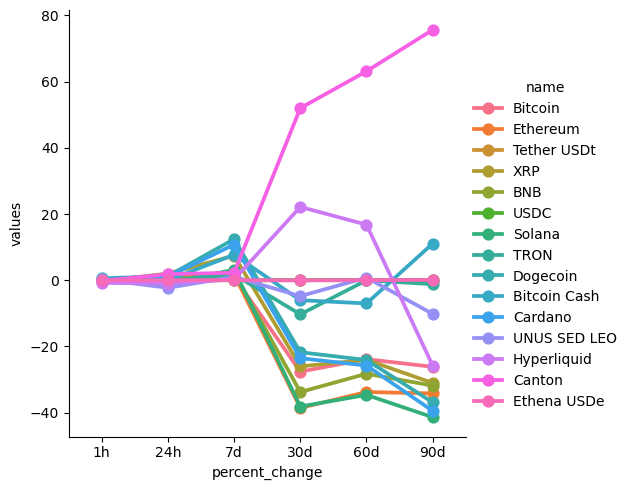

In [42]:
# Crypto Currencies Percent Change over time
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [49]:
# ANALYZE BITCOIN TREND
df8 = df[['name', 'quote.USD.price','timestamp']]
df8 = df8.query("name == 'Bitcoin'")

df8

,name,quote.USD.price,timestamp
0,Bitcoin,67148.46661,2026-02-18 23:00:51.968995
15,Bitcoin,67150.76662,2026-02-18 23:01:56.200595
30,Bitcoin,67257.75186,2026-02-18 23:03:00.667395


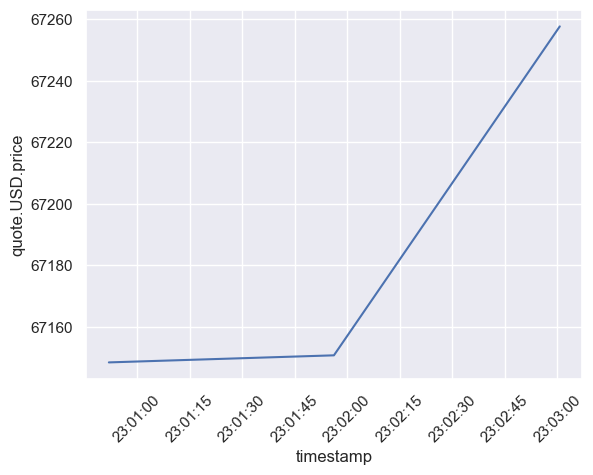

In [57]:
# VISUALIZE DF8
sns.set_theme(style = "darkgrid")
sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df8)

# Format x-axis to show just time (HH:MM:SS)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)
plt.show()